In [656]:
from IPython.display import HTML# Hide code
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [657]:
import numpy as np
import pandas as pd

In [658]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [659]:
#import plotly.plotly as py
#import plotly.graph_objs as go
#import plotly.tools as tls
#tls.set_credentials_file(username='drozen', api_key='GTP8SX2KBqr3loYdTVb6')

In [660]:
df = pd.read_csv('data/CC2017ForDisplay.csv')

In [661]:
df = df[df['Transaction']=='DEBIT'] 
df = df[df['Memo'].notnull()] # remove null entries

In [662]:
# credit card payments
dfCr = pd.read_csv('data/CC2017ForDisplay.csv')
dfCr = dfCr[dfCr['Transaction']=='CREDIT'] 
dfCR= dfCr[dfCr['Memo'].notnull()] # remove null entries

### Total Amount of Returns

In [663]:
dfCr[dfCr['Name']!='PREAUTHORIZED PAYMENT'].sum()[4]  # amount of returns

2535.68

In [664]:
dfPay = dfCr[dfCr['Name']=='PREAUTHORIZED PAYMENT']

In [665]:
#fPay.count()[0]

In [666]:
#dfPay.sum()[4]

In [667]:
#(dfPay.sum()[4] - dfCr[dfCr['Name']!='PREAUTHORIZED PAYMENT'].sum()[4] + 3227.75 - 1320) /12   # total amount spent per month

In [668]:
df['Amount'] = df['Amount'].apply(pd.to_numeric, errors='coerce') *-1 #convert to int and convert amounts to positive
df['Transaction date'] = pd.to_datetime(df['Transaction date']) # get date info
df['Month'] = df['Transaction date'].apply(lambda x : x.month)
df['Day'] = df['Transaction date'].apply(lambda x : x.day)
df['Day of Week'] = df['Transaction date'].apply(lambda x : x.dayofweek)


In [669]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
DayOfWeek = list(map(lambda var: dmap[var],df['Day of Week']))
df['Day of Week'] = DayOfWeek


In [670]:
### Transaction types

In [671]:
def returnCategory(x):
    return x.split(' ~ Category: ')[1]

def returnName(x):
    return x.split(' ')[0]

In [672]:
# create category column
df['Category']=df['Memo'].apply(returnCategory)

# create single name column
df['Single Name']=df['Name'].apply(returnName)


## Transaction Counts

In [673]:
#df['Name'].value_counts().head(10)

## Find total spending category (eg. gas) purchase amounts for the year

In [674]:
df['Memo'].apply(returnCategory).value_counts()

Auto                245
Groceries           153
Gas                  55
RESTO                50
Bill Payment         45
Drug Store           31
Parking              17
Furniture             9
Home Improvement      8
Hotel                 2
Name: Memo, dtype: int64

In [675]:
dfCat = df.groupby(['Category','Day of Week']).sum()
dfCatUnstacked = dfCat.unstack()['Amount']

In [676]:
dfCatOnly = df.groupby(['Category']).sum()

[Text(0,0.5,'Amount Spent ($)')]

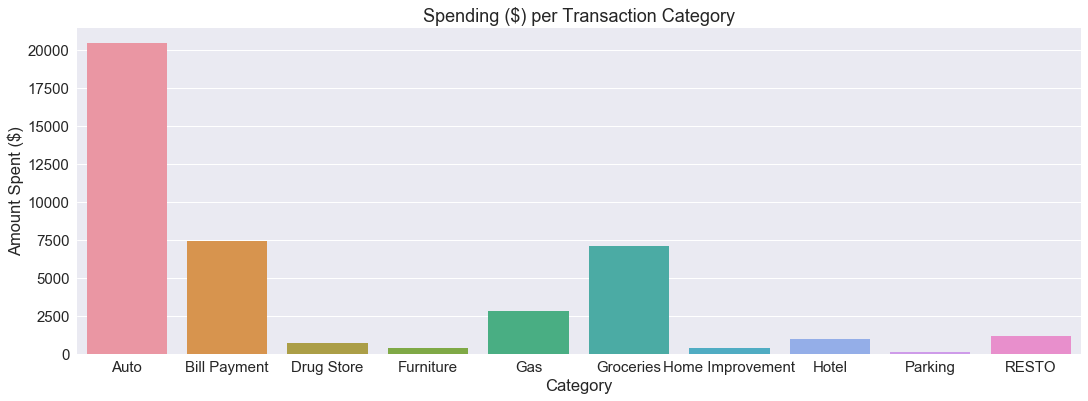

In [677]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots()
fig.set_size_inches(18,6)
sns.barplot(ax=ax, x='Category', y = 'Amount', data = dfCatOnly.reset_index()
    ).set_title('Spending ($) per Transaction Category')
ax.set(ylabel='Amount Spent ($)')
#plt.tight_layout()

Text(0.5,1,'Heatmap Displaying $ Spent per Category per Day of Week')

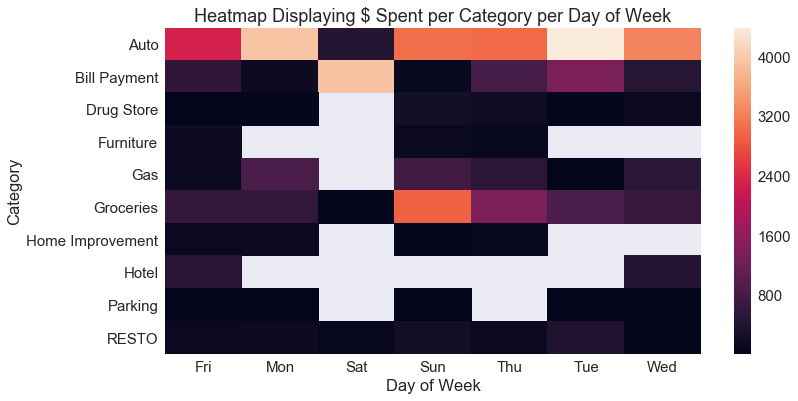

In [678]:
sns.set(font_scale=1.5)

plt.figure(figsize=(12,6))
sns.heatmap(dfCatUnstacked).set_title('Heatmap Displaying $ Spent per Category per Day of Week')

In [679]:
#sns.clustermap(dfCatUnstacked)

[Text(0,0.5,'Amount Spent ($)')]

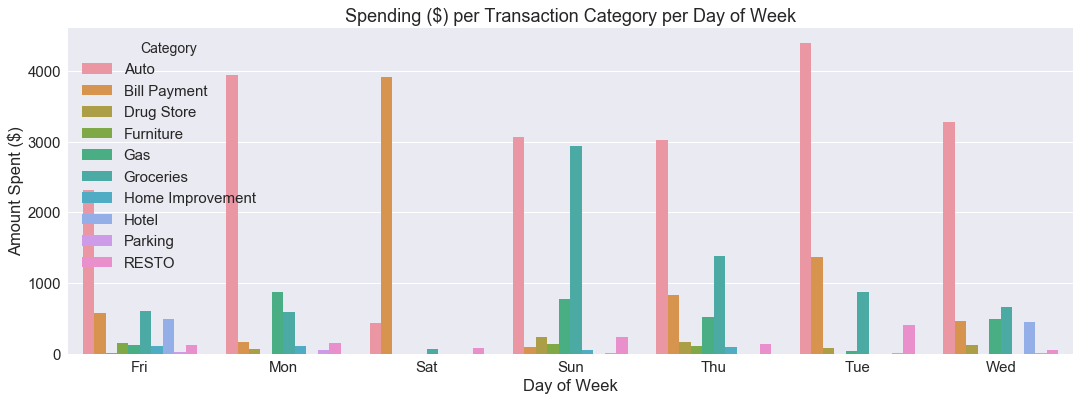

In [680]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots()
fig.set_size_inches(18,6)
sns.barplot(ax=ax, x='Day of Week', y = 'Amount', data = dfCat.reset_index(), hue = 'Category', estimator=sum
    ).set_title('Spending ($) per Transaction Category per Day of Week')
ax.set(ylabel='Amount Spent ($)')
#plt.tight_layout()

[Text(0,0.5,'Amount Spent ($)')]

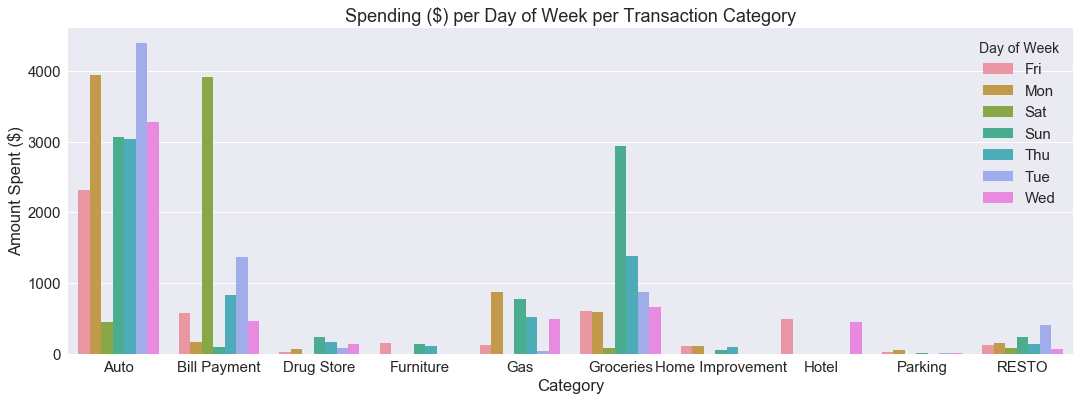

In [681]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots()
fig.set_size_inches(18,6)
sns.barplot(x='Category', y = 'Amount', data = dfCat.reset_index(), hue = 'Day of Week', estimator=sum, ax=ax).set_title('Spending ($) per Day of Week per Transaction Category')
ax.set(ylabel='Amount Spent ($)')

In [682]:
categoryList = df['Memo'].apply(returnCategory).unique()

In [683]:
nameAmtDict = {}
def nameAmt(name, df=df):
    dfCat = df[df['Name'].apply(returnName)==name]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['Amount'].sum()*1,2)
    #print("%.2f" % returnVal)
    return round(returnVal, 2)

In [684]:
def updateDict(name):
    nameAmtDict[name] = nameAmt(name)

In [685]:
#df['Name'].apply(returnName).value_counts().head(8)                                   

In [686]:
# nameList = ["ABE'S", "PERSONAL", "NOFRILLS", "ESSO", "COSTCO", "WAL-MART", "WINNERS", "CARTER'S", "SAVOURS", "DR", "URTH", "HERMES"]
# nameAmtDict = {}
# for name in nameList:
#     updateDict(name)
# nameAmtDict

In [687]:
# D = nameAmtDict

# fig, ax = plt.subplots(figsize=(15, 8))

# ax.bar(range(len(D)), D.values(), align='center')
# plt.xticks(range(len(D)), list(D.keys()))
# plt.title("Spending per Store")
# plt.xlabel("Store")
# plt.ylabel("Dollars $")
# plt.figure(figsize=(100,100))

# plt.show()

In [688]:
# labels=list(D.keys())
# values=list(D.values())
# trace=go.Pie(labels=labels,values=values)
# #py.iplot([trace])

In [689]:
categoryAmtDict = {}
def categoryAmt(category, df=df):
    dfCat = df[df['Memo'].apply(returnCategory)==category]
    dfCat = dfCat.apply(pd.to_numeric, errors='coerce') #convert to int
    returnVal = round(dfCat['Amount'].sum()*1,2)
    print("%.2f" % returnVal)
    return round(returnVal, 2)

In [690]:
def updateDict(category):
    categoryAmtDict[category] = categoryAmt(category)

In [691]:
# D = categoryAmtDict
# fig, ax = plt.subplots(figsize=(15, 8))

# ax.bar(range(len(D)), D.values(), align='center')
# plt.xticks(range(len(D)), list(D.keys()))
# plt.title("Spending per Category")
# plt.xlabel("Category")
# plt.ylabel("Amount Spent ($)")
# #plt.figure(figsize=(100,100))

# plt.show()

In [692]:
labels=list(D.keys())
values=list(D.values())
#trace=go.Pie(labels=labels,values=values)
#py.iplot([trace])

In [693]:
#Find Abes records

In [694]:
dfAbes = df[df['Name'].apply(lambda x: x.split(' ')[0])=="ABE'S"]

In [695]:
dfSavours = df[df['Name'].apply(lambda x: x.split(' ')[0])=="SAVOURS"]

In [696]:
#Investigate BillPayment category transactions

In [697]:
dfBill = df[df['Memo'].apply(returnCategory)=="Bill Payment"]

In [698]:
dfOther = df[df['Memo'].apply(returnCategory)=="Other"]

## Investigate sums by names

In [699]:
#df.groupby('Single Name').sum().head(5)

## Report sums only for at stores purchases more than 10 times

In [700]:
threshold = 10

dfsum = df.groupby('Single Name').sum()[df.groupby('Single Name').count()['Name']>threshold]
#dfmean.reset_index().head(5) #turn index into a column

## Total Purchase Amount Per Store

[Text(0.5,0,'Store Name')]

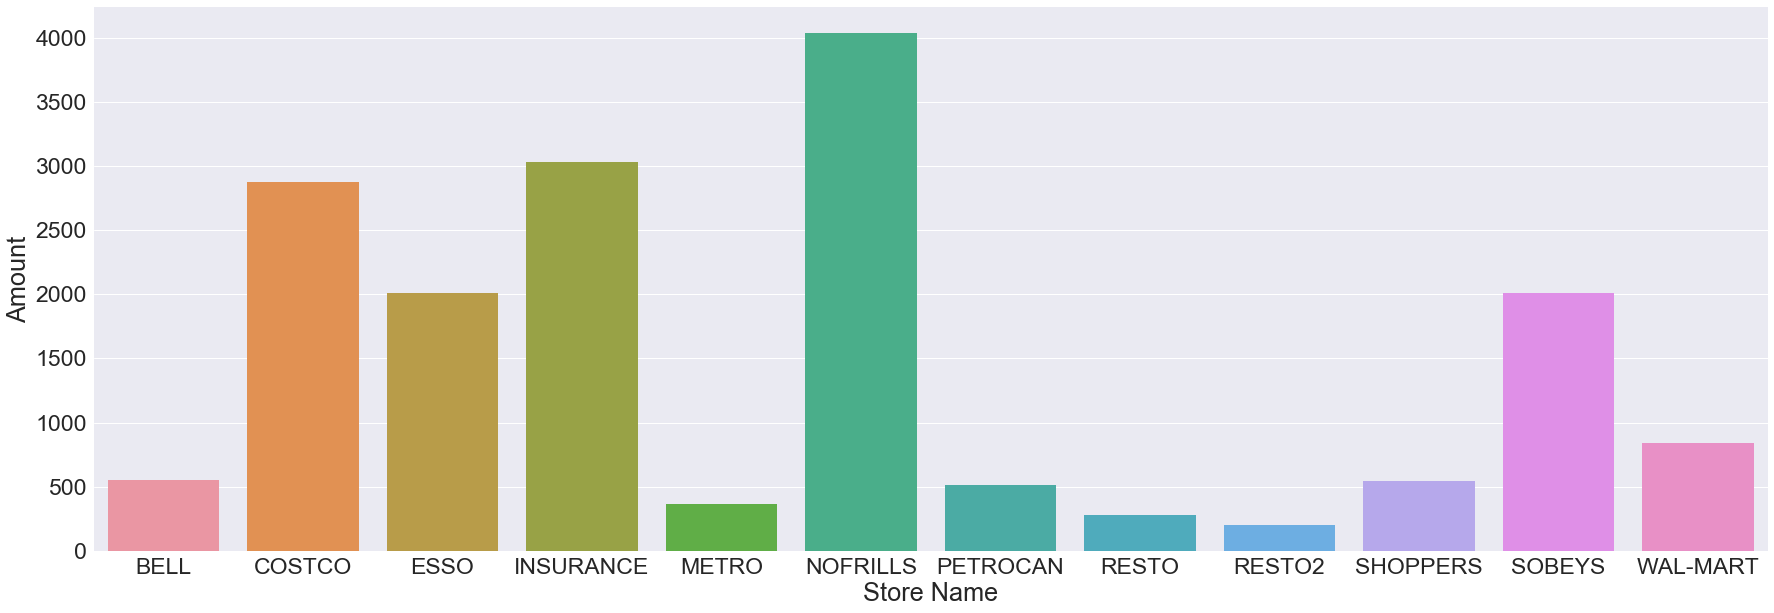

In [702]:
a4_dims = (30, 10)
sns.set(font_scale=2.3)

fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='Single Name', y='Amount',data=dfsum.reset_index(),estimator=sum)
ax.set(xlabel='Store Name')

## Average Purchase Amount Per Store

[Text(0.5,0,'Store Name')]

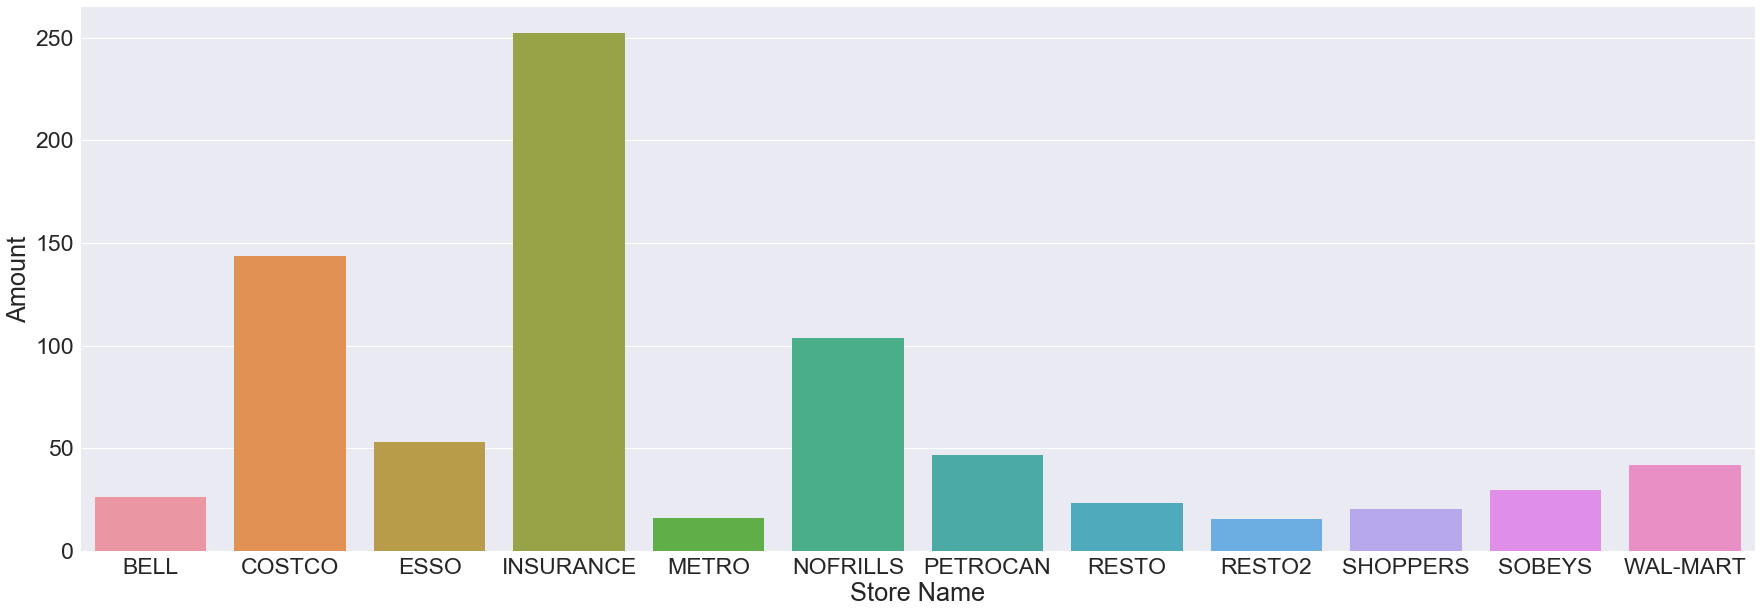

In [704]:
dfmean = df.groupby('Single Name').mean()[df.groupby('Single Name').count()['Name']>threshold]
a4_dims = (30, 10)
sns.set(font_scale=2.3)

fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.barplot(x='Single Name', y='Amount',data=dfmean.reset_index(),estimator=sum)
ax.set(xlabel='Store Name')